# Adding Features and DocString to Functions

***Author: Eda AYDIN***

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Mission 1
Add 1 attribute to the cat_summary() function. Let this property be formattable with an argument. You can also make an existing property controllable with an argument.

In [5]:
def cat_summary(dataframe, col_name, plot=False, show_missing_data=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if show_missing_data:
        if "_" not in str(col_name):
            print("Missing data of {} : {}".format(str(col_name.capitalize()), str(dataframe[col_name].isnull().sum())))
        if "_" in str(col_name):
            words = col_name.split("_")
            new_col_name = words[0].capitalize() + " " + "_".join(map(lambda x: x.capitalize(), words[1:]))
            print("Missing data of {} : {}".format(str(new_col_name), str(dataframe[col_name].isnull().sum())))
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

In [6]:
categorical_cols = [col for col in df.columns if
                    str(df[col].dtypes) in ["category", "object", "bool"]]

nominal_cols = [col for col in df.columns if
                df[col].nunique() < 10 and df[col].dtypes in ["int64", "float64"]]


In [7]:
categorical_cols += nominal_cols

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################
Missing data of Sex : 0


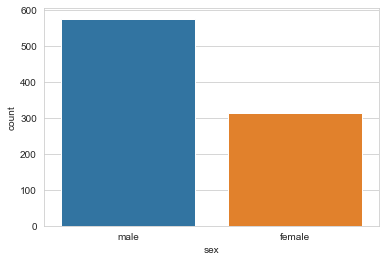

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################
Missing data of Embarked : 2


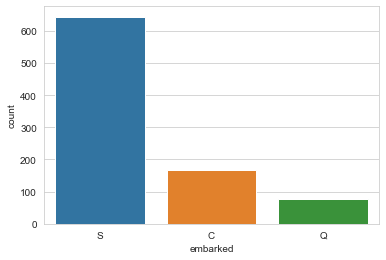

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################
Missing data of Class : 0


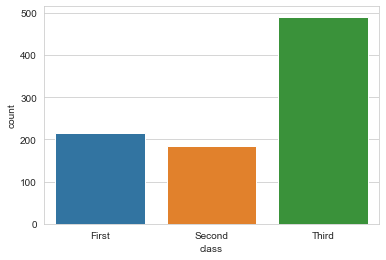

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################
Missing data of Who : 0


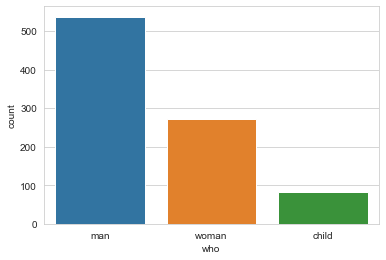

       adult_male     Ratio
True          537  60.26936
False         354  39.73064
##########################################
Missing data of Adult Male : 0


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [8]:
for col in categorical_cols:
    cat_summary(df, col, plot=True, show_missing_data=True)

### Mission 2
Write a numpy-style docstring containing 4 information (if applicable) to the check_df(), cat_summary() functions. (task, params, return, example)

In [ ]:
def check_dataframe(dataframe, head=5):
    """
    This function was written to print basic information about the dataframe.

    Parameters
    ----------
    dataframe : dataframe
        This variable is the dataframe whose names are to be retrieved.
    head : int
        This feature is used when printing data. Displays the first rows of the dataframe for the specified number of times.
        Example: if head = 5, first 5 lines, head = 3, first 3 lines

    Returns: It does not return any value, the function is only used to output.
    -------

    """
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("\n##################### Types #####################")
    print(dataframe.dtypes)
    print("\n##################### Head #####################")
    print(dataframe.head(head))
    print("\n##################### Tail #####################")
    print(dataframe.tail(head))
    print("\n##################### NA #####################")
    print(dataframe.isnull().sum())
    print("\n##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_dataframe(dataframe=df)

In [ ]:
def cat_summary(dataframe, col_name, plot=False, show_missing_data=False):
    """

    Parameters
    ----------
    dataframe : dataframe
        This variable is the dataframe whose names are to be retrieved.
    col_name : str
        It takes the column name in the dataframe as str.
    plot : bool
        If plot is desired, it takes the plot expression as bool type True. If not requested, it gets False.
    show_missing_data : bool
        If it is desired to show whether there is missing data and how many, show_missing_data takes bool type as True. If not requested, it gets False.

    Returns
        It does not return any value, the function is only used to output and plot the graph.
    -------

    """
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if show_missing_data:
        if "_" not in str(col_name):
            print("Missing data of {} : {}".format(str(col_name.capitalize()), str(dataframe[col_name].isnull().sum())))
        if "_" in str(col_name):
            words = col_name.split("_")
            new_col_name = words[0].capitalize() + " " + "_".join(map(lambda x: x.capitalize(), words[1:]))
            print("Missing data of {} : {}".format(str(new_col_name), str(dataframe[col_name].isnull().sum())))
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)